# Análisis exploratorio de los datos

## 1. Cargamos el dataset

In [7]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("../data_clean.csv")
# Revisar los primeros registros
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,DayOfWeek,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter


## 2. Exploración de los datos

### Ventas por mes

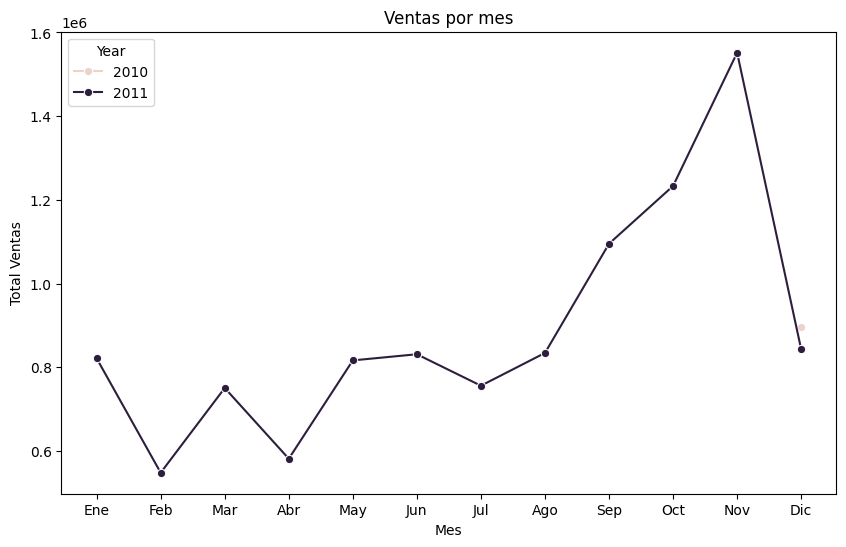

In [8]:
df['Month'] = df['Month'] - 1 # Restar 1 para que los meses empiecen en 0
monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalSales', hue='Year', marker='o')

# Formatear el eje x para mostrar abreviaciones de los meses
plt.xticks(ticks=range(len(monthly_sales['Month'].unique())), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.show()


### Ventas por estación del año

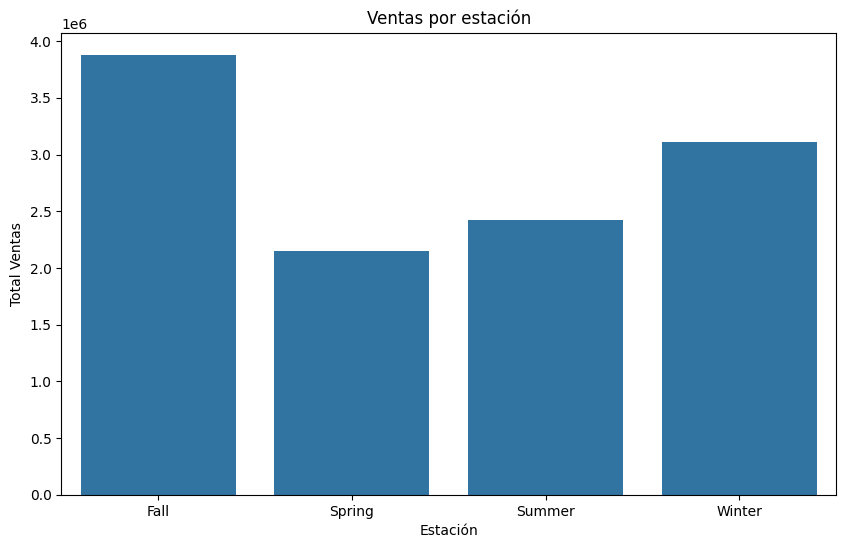

In [9]:
# Ventas por estación
season_sales = df.groupby('Season')['TotalSales'].sum().reset_index()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(data=season_sales, x='Season', y='TotalSales')
plt.title('Ventas por estación')
plt.xlabel('Estación')
plt.ylabel('Total Ventas')
plt.show()

### Top 10 - Clientes con mayores compras

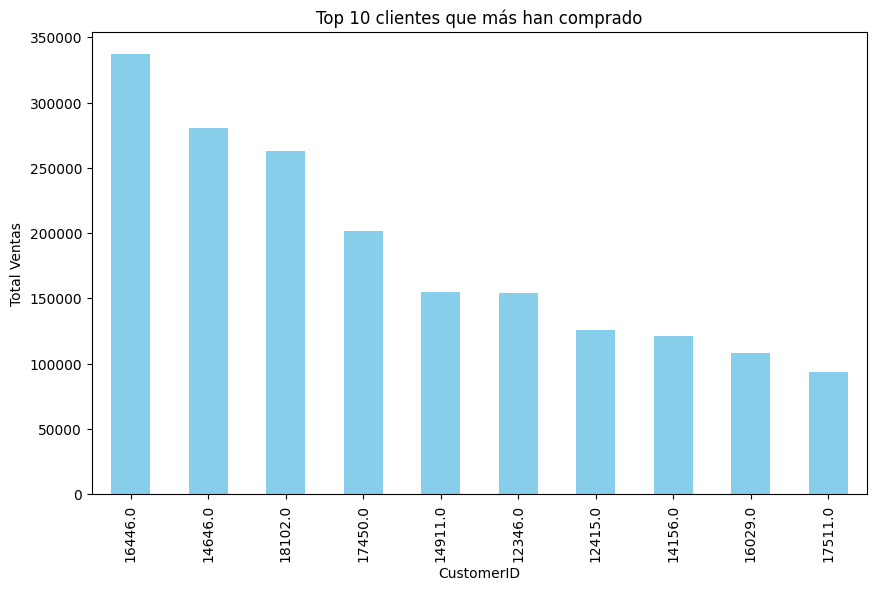

In [10]:
# Ventas por cliente
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Graficar
plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 clientes que más han comprado')
plt.xlabel('CustomerID')
plt.ylabel('Total Ventas')
plt.show()

### Paises con más ventas

C:\Users\Wiler\AppData\Local\Temp\ipykernel_11428\2302764646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales.sort_values('TotalSales', ascending=False).head(10),


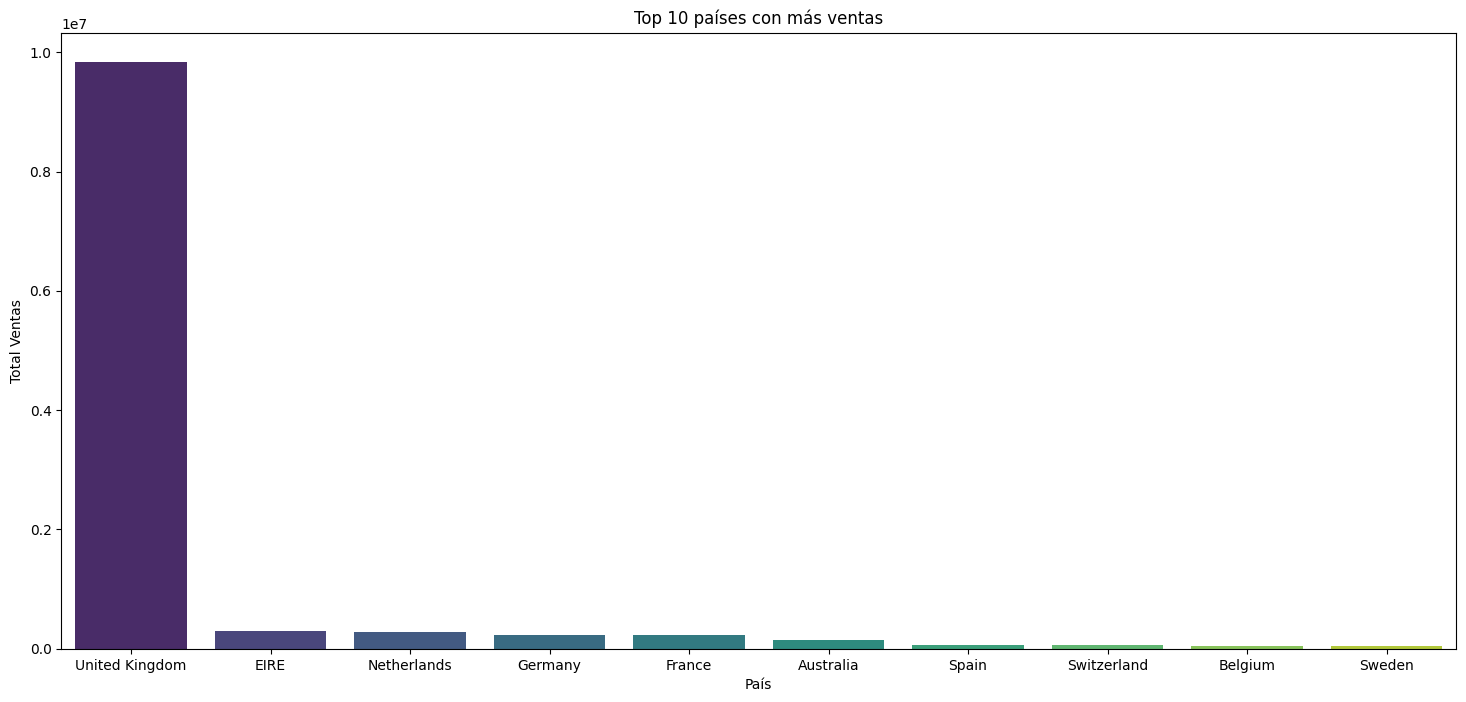

In [ ]:
# Ventas por país
country_sales = df.groupby('Country')['TotalSales'].sum().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(data=country_sales.sort_values('TotalSales', ascending=False).head(10), 
            x='Country', y='TotalSales', palette='viridis')
plt.title('Top 10 países con más ventas')
plt.xlabel('País')
plt.ylabel('Total Ventas')
plt.xticks(rotation=0)
plt.show()

### Frecuencia de ventas por cada día de la semana

C:\Users\Wiler\AppData\Local\Temp\ipykernel_11428\1072671765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='DayOfWeek', y='TotalSales', palette='coolwarm')


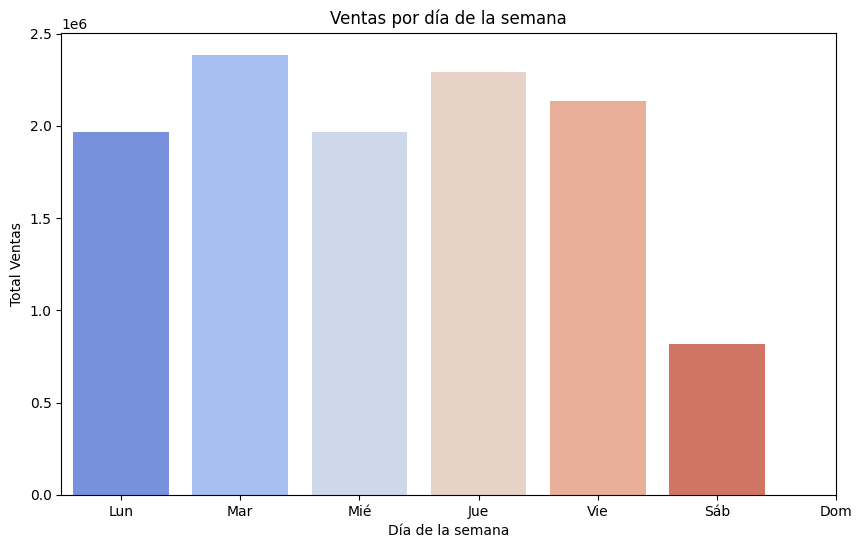

In [16]:
# Ventas por día de la semana
weekday_sales = df.groupby('DayOfWeek')['TotalSales'].sum().reset_index()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(data=weekday_sales, x='DayOfWeek', y='TotalSales', palette='coolwarm')
plt.title('Ventas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Total Ventas')
plt.xticks(ticks=range(7), labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

### Top - 10 productos más vendidos (por hacer)

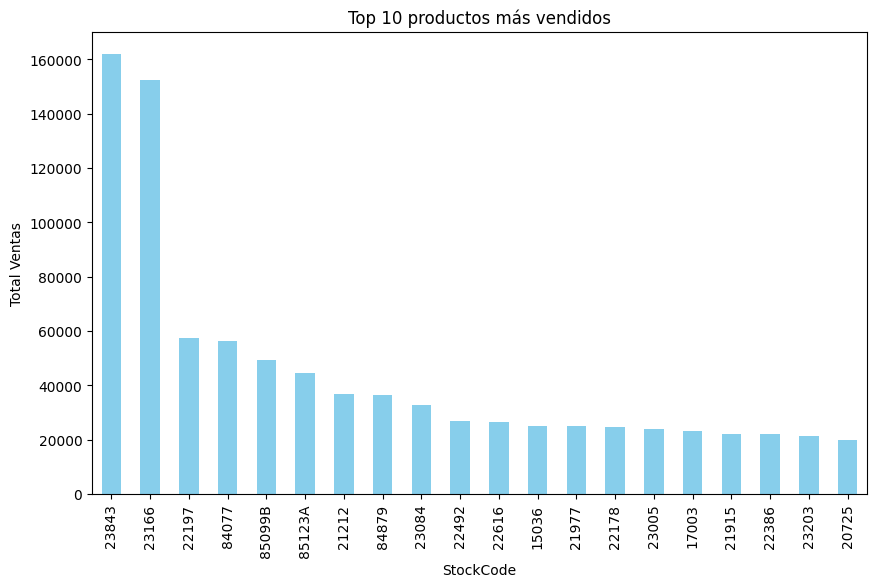

In [22]:
# Ventas por cliente
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(20)

# Graficar
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 productos más vendidos')
plt.xlabel('StockCode')
plt.ylabel('Total Ventas')
plt.show()